#### Predicting X_Ray images using Keras

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as  pd
import tqdm
import os, shutil
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
# Load the data directory
data = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/Computer Programming/Data Science/Machine_Learning+Data_Science_NLP/ZINDI DATA SCIENCE COMPETITIONS/DATASETS/keras-covid-19/dataset'
data_covid = os.path.join(data, 'covid')
data_normal = os.path.join(data, 'normal')

test = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/Computer Programming/Data Science/Machine_Learning+Data_Science_NLP/ZINDI DATA SCIENCE COMPETITIONS/DATASETS/keras-covid-19/test'
test_covid = os.path.join(test, 'covid')
test_normal = os.path.join(test, 'normal')

In [3]:
# Data Processing
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/.255)
train_generator = datagen.flow_from_directory(data, target_size=(150,150), batch_size=1, class_mode='binary')
test_generator = datagen.flow_from_directory(test, target_size=(150,150), batch_size=1, class_mode='binary')

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
# Transfer Learning
from keras.applications import DenseNet121
conv_base = DenseNet121(weights='densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(150,150,3))

In [5]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size=1
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 1024))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [6]:
train_features, train_labels = extract_features(data, 40)
test_features, test_labels = extract_features(test, 10)

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [7]:
train_features = np.reshape(train_features, (40, 4 * 4 * 1024))
test_features = np.reshape(test_features, (10, 4 * 4 * 1024))

In [8]:
# Classifier
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(4*4*1024,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

# Fit the model
history = model.fit(train_features, train_labels, epochs=20, validation_data=(test_features, test_labels))

Train on 40 samples, validate on 10 samples
Epoch 1/20
40/40 [==============================] - 0s 7ms/step - loss: 0.8819 - acc: 0.8250 - val_loss: 1.1072 - val_acc: 0.5000
Epoch 2/20
40/40 [==============================] - 0s 781us/step - loss: 2.0673 - acc: 0.6250 - val_loss: 0.0880 - val_acc: 1.0000
Epoch 3/20
40/40 [==============================] - 0s 781us/step - loss: 0.5698 - acc: 0.8000 - val_loss: 0.1404 - val_acc: 0.9000
Epoch 4/20
40/40 [==============================] - 0s 944us/step - loss: 0.5641 - acc: 0.7750 - val_loss: 0.1870 - val_acc: 0.9000
Epoch 5/20
40/40 [==============================] - 0s 781us/step - loss: 0.5197 - acc: 0.8000 - val_loss: 0.0311 - val_acc: 1.0000
Epoch 6/20
40/40 [==============================] - 0s 781us/step - loss: 0.1676 - acc: 0.9500 - val_loss: 0.0117 - val_acc: 1.0000
Epoch 7/20
40/40 [==============================] - 0s 781us/step - loss: 0.1941 - acc: 0.9250 - val_loss: 0.0179 - val_acc: 1.0000
Epoch 8/20
40/40 [================

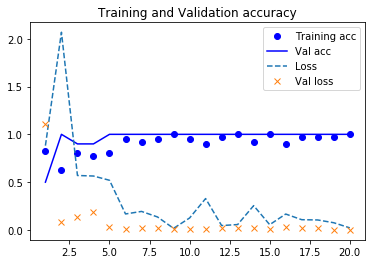

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Val acc')
plt.plot(epochs, loss, '--', label='Loss')
plt.plot(epochs, val_loss, 'x', label='Val loss')
plt.title('Training and Validation accuracy')
plt.legend(loc='best')
plt.savefig('Metrics.png', bbox_inches='tight')

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as  pd
import tqdm
import os, shutil
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
# Load the data directory
data = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/Computer Programming/Data Science/Machine_Learning+Data_Science_NLP/ZINDI DATA SCIENCE COMPETITIONS/DATASETS/keras-covid-19/dataset'
data_covid = os.path.join(data, 'covid')
data_normal = os.path.join(data, 'normal')

test = 'C:/Users/ADEMOLA/Documents/AYOBAMI_DOCUMENT/Computer Programming/Data Science/Machine_Learning+Data_Science_NLP/ZINDI DATA SCIENCE COMPETITIONS/DATASETS/keras-covid-19/test'
test_covid = os.path.join(test, 'covid')
test_normal = os.path.join(test, 'normal')

In [4]:
# Transfer Learning
from keras.applications import DenseNet121
conv_base = DenseNet121(weights='densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(150,150,3))

In [7]:
from keras import layers, models
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1 , activation='sigmoid'))

In [9]:
conv_base.trainanble = False

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                  width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(data, target_size=(150,150),
                                                     batch_size=10, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test, target_size=(150,150,3), batch_size=1, class_mode='binary')
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr=2e-5), metrics=['acc'])

Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=2, epochs=30, validation_data=test_generator)